In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
# Setup device-agnostic code
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device



In [ ]:
mat = torch.tensor([[3,4], [4,4], [1, 0]])
mat

In [ ]:
tens = torch.tensor([[[1,2,3],
                      [3, 6, 9],
                      [2, 4, 5]]])

tens

In [ ]:
tens2 = torch.tensor([[[1, 2, 3],
                       [3, 6, 9],
                       [2, 4, 5]],
                      
                      [[9, 9, 1],
                       [4, 1, 0],
                       [7, 5, 3]]])

tens2

In [ ]:
tens2.shape

In [ ]:
tens.squeeze().size()

In [ ]:
random_tensor = torch.rand(size=(3,3,4))
random_tensor

In [ ]:
random_tensor[0] 

In [ ]:
torch.arange(0, 100, step=10)

In [ ]:


# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device


In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10


In [ ]:
n = 2

In [ ]:
a = torch.rand(n, n)
b = torch.rand(n, n)
torch.matmul(a, b)

In [ ]:
a = torch.rand(n, n).to(device)
b = torch.rand(n, n).to(device)
torch.matmul(a, b)

In [ ]:
a

In [ ]:
b

In [ ]:
a[1][0] * b[0][0] + a[1][1] * b[1][0]

In [ ]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32).T

torch.matmul(tensor_A, tensor_B) # (this will error)

In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6,
                         device=None) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")


In [ ]:
torch.matmul(x, torch.rand(size=(x.shape[1], 6)))

In [ ]:
torch.rand(size=(2,2)).argmax()

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Setup device-agnostic code
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

c:\Users\jako\Anaconda3\envs\jako_testar\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jako\Anaconda3\envs\jako_testar\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\jako\Anaconda3\envs\jako_testar\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\jako\Anaconda3\envs\jako_testar\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'cuda:0'

In [98]:
# Create *known* parameters
# weight = 0.7

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
weight = 0.7
bias = torch.rand(1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.8080],
         [0.8220],
         [0.8360],
         [0.8500],
         [0.8640],
         [0.8780],
         [0.8920],
         [0.9060],
         [0.9200],
         [0.9340]]))

In [99]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [100]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


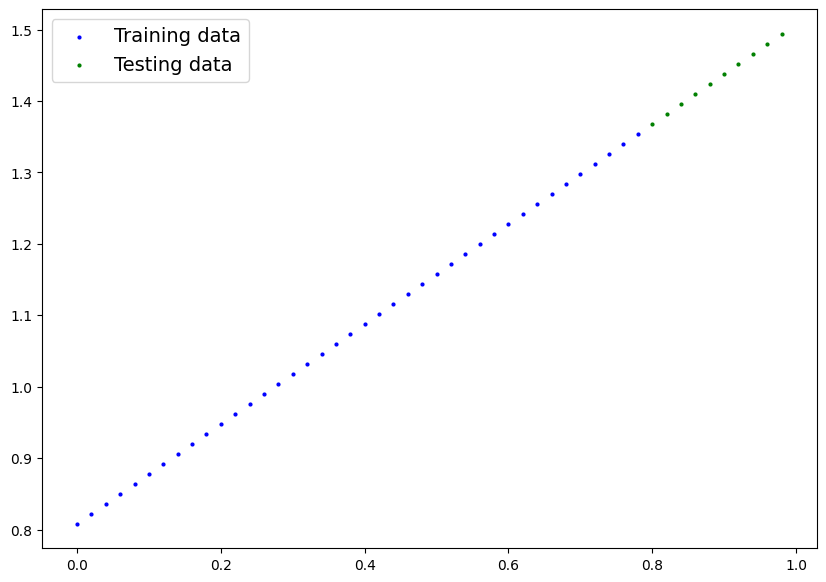

In [101]:
plot_predictions()

In [103]:
# Create a Linear Regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [104]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-1.5809], requires_grad=True),
 Parameter containing:
 tensor([-0.2329], requires_grad=True)]

In [105]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.5809])), ('bias', tensor([-0.2329]))])

In [106]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [107]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-1.4976],
        [-1.5292],
        [-1.5608],
        [-1.5924],
        [-1.6241],
        [-1.6557],
        [-1.6873],
        [-1.7189],
        [-1.7505],
        [-1.7821]])


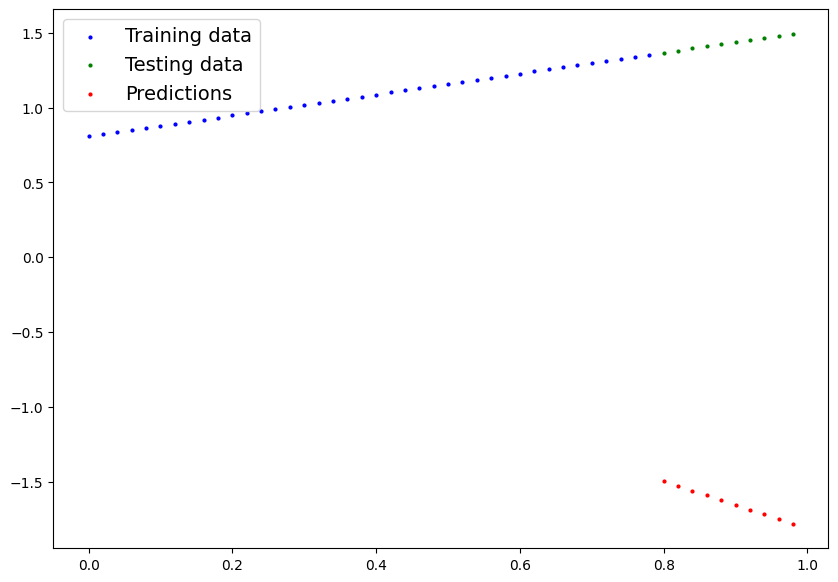

In [108]:
plot_predictions(predictions=y_preds)

In [109]:
weight

0.7

In [110]:
# Create the loss function
loss_fn = nn.MSELoss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [124]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 10 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 20 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 30 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 40 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 50 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 60 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 70 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 80 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 90 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 
Epoch: 100 | MAE Train Loss: 8.197451745184381e-11 | MAE Test Loss: 3.2598421184637516e-10 

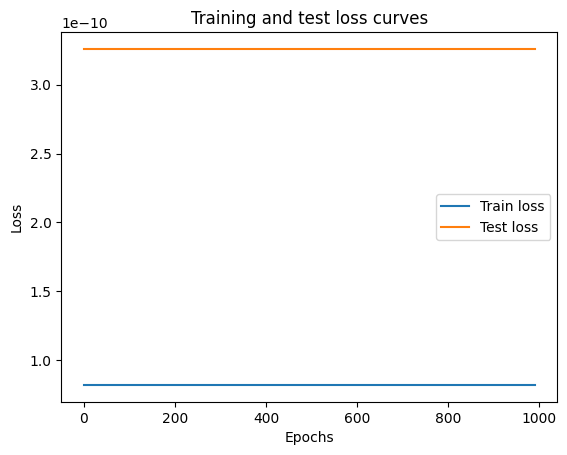

In [125]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [129]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.8081]))])

And the original values for weights and bias are:
weights: 0.7, bias: tensor([0.8080])


In [131]:
model_0.eval()

with torch.inference_mode():
    model_0.to(device)
    X_test = X_test.to(device)
    y_preds = model_0(X_test)

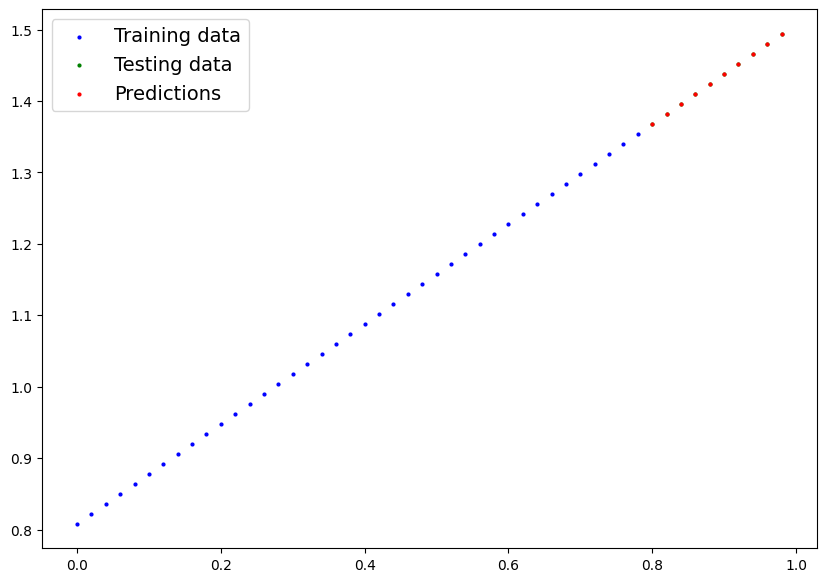

In [135]:
plot_predictions(predictions=y_preds.cpu())

In [136]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_workflow_model_0.pth


In [144]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [146]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test.cpu())

In [149]:
loaded_model_preds, y_preds

(tensor([[1.3680],
         [1.3820],
         [1.3960],
         [1.4100],
         [1.4240],
         [1.4380],
         [1.4520],
         [1.4660],
         [1.4800],
         [1.4940]]),
 tensor([[1.3680],
         [1.3820],
         [1.3960],
         [1.4100],
         [1.4240],
         [1.4380],
         [1.4520],
         [1.4660],
         [1.4800],
         [1.4940]], device='cuda:0'))

In [150]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [151]:


# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

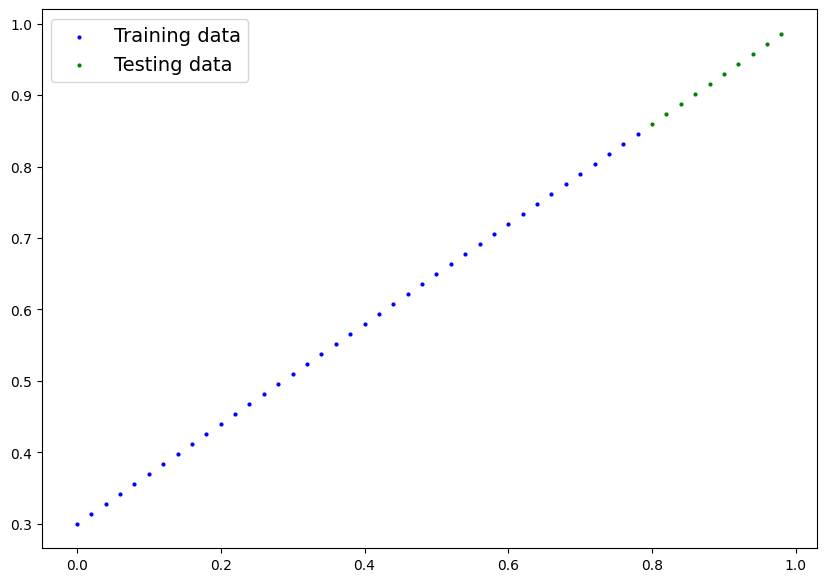

In [152]:
# Note: If you've reset your runtime, this function won't work, 
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

In [158]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [159]:
# Check model device
next(model_1.parameters()).device


device(type='cpu')

In [161]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device


device(type='cuda', index=0)

In [162]:
# Create loss function
loss_fn = nn.MSELoss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [167]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 10000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.00014480651589110494 | Test loss: 0.0006327090668492019
Epoch: 100 | Train loss: 0.00012047379277646542 | Test loss: 0.0005263901548460126
Epoch: 200 | Train loss: 0.00010022918286267668 | Test loss: 0.0004379366582725197
Epoch: 300 | Train loss: 8.338668703800067e-05 | Test loss: 0.0003643475938588381
Epoch: 400 | Train loss: 6.937482248758897e-05 | Test loss: 0.00030312183662317693
Epoch: 500 | Train loss: 5.771610449301079e-05 | Test loss: 0.0002521800633985549
Epoch: 600 | Train loss: 4.801740215043537e-05 | Test loss: 0.00020980472618248314
Epoch: 700 | Train loss: 3.994898361270316e-05 | Test loss: 0.000174549815710634
Epoch: 800 | Train loss: 3.3236115996260196e-05 | Test loss: 0.00014521913544740528
Epoch: 900 | Train loss: 2.7651329219224863e-05 | Test loss: 0.00012081789463991299
Epoch: 1000 | Train loss: 2.300474079675041e-05 | Test loss: 0.00010051606659544632
Epoch: 1100 | Train loss: 1.9139290088787675e-05 | Test loss: 8.362656808458269e-05
Epoch:

In [168]:


# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")


The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7000]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3000], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [169]:


# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]], device='cuda:0')

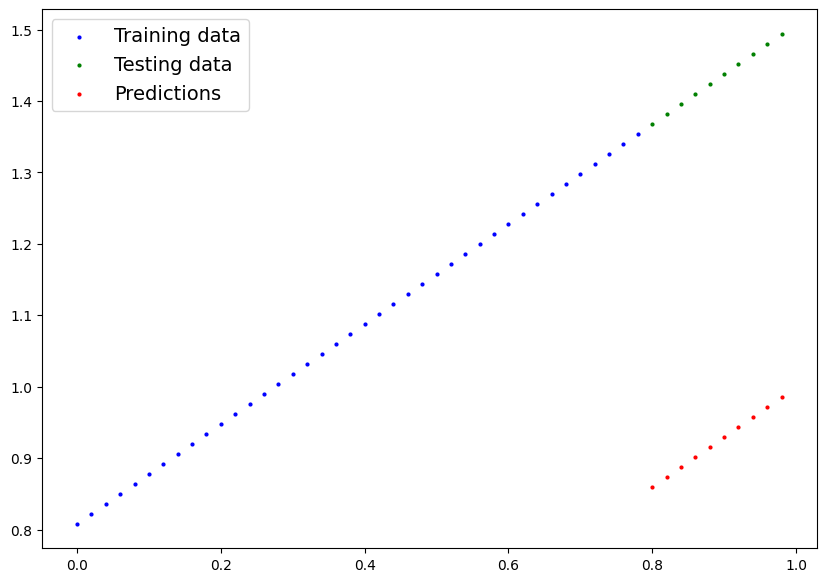

In [170]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())


In [171]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [172]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [173]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [174]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [183]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [184]:


print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")



First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [185]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [187]:
circles.corr()

,X1,X2,label
X1,1.000000,-0.001138,-0.000765
X2,-0.001138,1.000000,0.000183
label,-0.000765,0.000183,1.000000


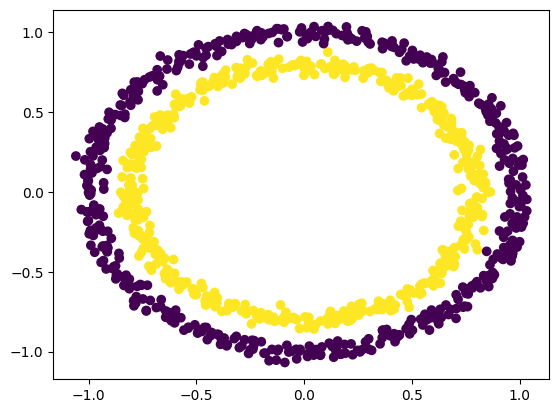

In [197]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [200]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [201]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [202]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)